# Signal Analysis

(0.07, 0.1)

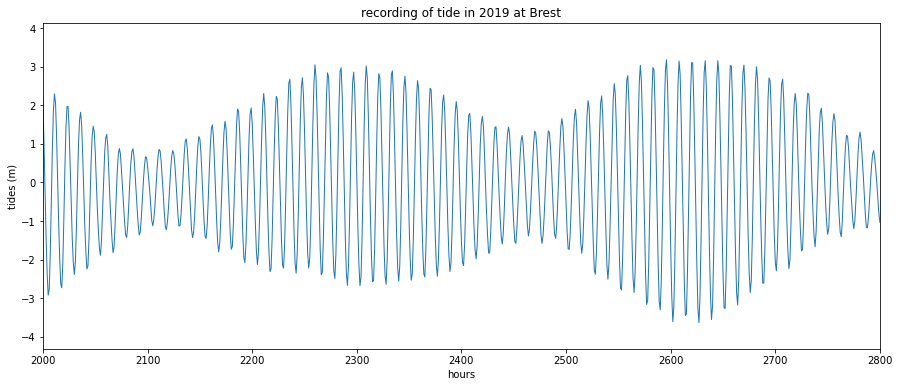

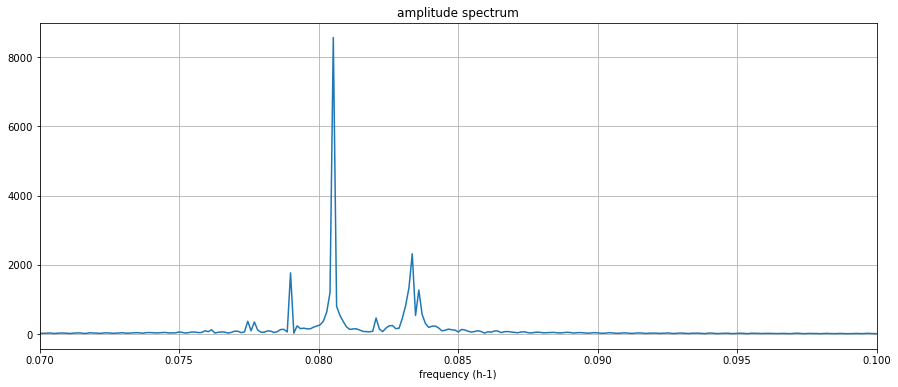

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from scipy.io import wavfile

A = np.loadtxt("Data/3_2019_load.txt", skiprows = 14)
data = A[:,1]-np.mean(A[:,1])
hours = A[:,0]

dt = 1
N = len(data)

MAR = fft.fft(data)
f = fft.fftfreq(N,dt)

plt.figure(figsize=(15,6))
plt.plot(hours,data,linewidth=1)
plt.xlabel('hours');plt.ylabel('tides (m)');plt.title('recording of tide in 2019 at Brest')
plt.xlim(2000,2800)

plt.figure(figsize=(15,6))
plt.plot(f[0:int(N/2)],np.abs(MAR[0:int(N/2)]))
plt.xlabel('frequency (h-1)')
plt.title('amplitude spectrum')
plt.grid()
plt.xlim(0.07, 0.1)

In [14]:
amp_max = np.max(np.abs(MAR))
i_amp_max = np.argmax(np.abs(MAR))
fmax = f[i_amp_max]
print(f"Max of amplitude spectrum is {round(amp_max, 2)}, at frequency {round(fmax, 2)} and period {round(1 / fmax, 2)}")

Max of amplitude spectrum is 8570.02, at frequency 0.08 and period 12.42


In [45]:
rate, data = wavfile.read("Data/meyxana.wav")
data = data[:,0]

print(rate)
print(np.shape(data))

dt = 1 / rate
N = len(data)
time = np.arange(0, N) * dt

data_fft = fft.fft(data)
f = fft.fftfreq(N, dt)

48000
(14757142,)


Text(0.5, 1.0, 'music')

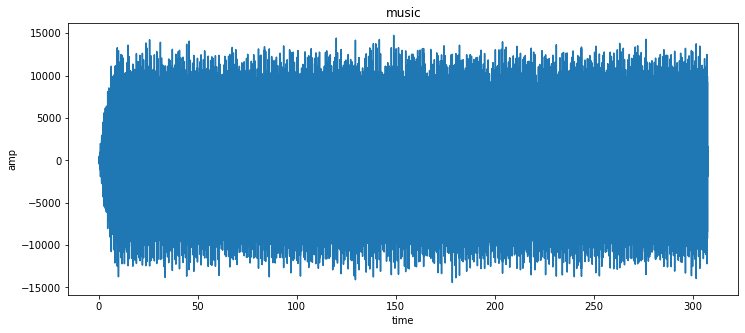

In [31]:
plt.figure(figsize=(32, 5))
plt.plot(time, data)
plt.xlabel("time")
plt.ylabel("amp")
plt.title("music")

Text(0.5, 1.0, 'amplitude spectrum')

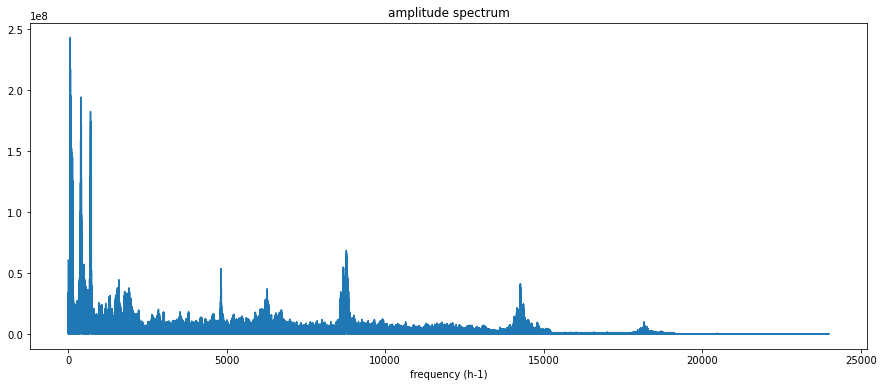

In [32]:
plt.figure(figsize=(32, 5))
plt.plot(f[0:int(N/2)],np.abs(data_fft[0:int(N/2)]))
plt.xlabel('frequency (h-1)')
plt.title('amplitude spectrum')

Text(0.5, 1.0, 'amplitude spectrum')

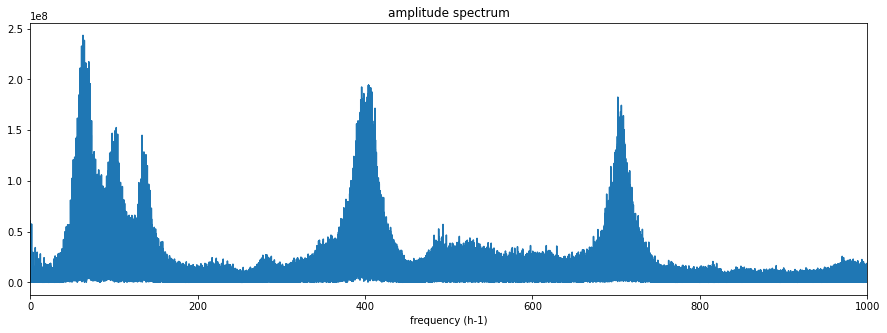

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(f[0:int(N/2)],np.abs(data_fft[0:int(N/2)]))
plt.xlim(0, 1000)
plt.xlabel('frequency (h-1)')
plt.title('amplitude spectrum')

In [54]:
ranges = ["[0:200]", "[200:500]", "[500:800]"]
name_of_data = "data_fft"

for i in ranges:
    data_range = eval(name_of_data + i)
    amp_max = np.max(np.abs(data_range))
    i_amp_max = np.argmax(np.abs(data_range))
    fmax = f[i_amp_max]
    print(f"Max of amplitude spectrum in the range [0, 200] is {round(amp_max, 2)}, at frequency {round(fmax, 2)} and period {round(1 / fmax, 2)}")

Max of amplitude spectrum in the range [0, 200] is 60567941.0, at frequency 0.0 and period inf
Max of amplitude spectrum in the range [0, 200] is 7074201.43, at frequency 0.84 and period 1.19
Max of amplitude spectrum in the range [0, 200] is 57607229.96, at frequency 0.03 and period 34.16
Max of amplitude spectrum in the range [0, 200] is 60567941.0, at frequency 0.0 and period inf
Max of amplitude spectrum in the range [200, 500] is 7074201.43, at frequency 0.84 and period 1.19
Max of amplitude spectrum in the range [500, 800] is 57607229.96, at frequency 0.03 and period 34.16
